# Homework 9

Author: Sherry

# Exercise 1

## (a)

In [1]:
import numpy as np

# define the function GenerateSamplePath() to generate a sample path of 
# stock price
def GenerateSamplePath(S0,r,sigma,T,m):
    St=S0
    S=[]
    k=0
    while k<m:
        S.append(St*np.exp((r-sigma*sigma*0.5)*(T/m) +sigma*np.sqrt(T/m)\
                           *np.random.standard_normal()))
        St=S[k]
        k=k+1
    return S


# define the function CallPayoff()
def CallPayoff(S0,r,sigma,T,m,SamplePath,K):
    ST=SamplePath[m-1]
    if ST<K:
        return 0
    else:
        return ST-K
    

# define the function PriceByMC() to replicate the simulation for N times
# and compute the average of the discounted payoffs which is the option  
# price by Monte Carlo simulation
def PriceByMC(S0,r,sigma,T,m,K,N):
    H=0
    S=[]
    p=[]
    i=0
    while i<N:
        S=GenerateSamplePath(S0,r,sigma,T,m)
        price=np.exp(-r*T)*CallPayoff(S0,r,sigma,T,m,S,K)
        H=(i/(i+1))*H + price/(i+1)
        i=i+1
    return H


# test
S0=110      # today's stock price
r=0.01      # interest rate
sigma=0.2   # volatility
T=1         # time to maturity
m=12        # number of time steps
K=100       # strike price
N=10000     # number of replications of the MC algorithm
print("European Call Option Price =",PriceByMC(S0,r,sigma,T,m,K,N))

European Call Option Price = 14.8144409408


## (b)

today's stock price [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
S = 50 , European Call Option Price by MC= 0.000319056357972
S = 60 , European Call Option Price by MC= 0.028958931138
S = 70 , European Call Option Price by MC= 0.307034179651
S = 80 , European Call Option Price by MC= 1.31944392725
S = 90 , European Call Option Price by MC= 3.74350549371
S = 100 , European Call Option Price by MC= 8.50615089578
S = 110 , European Call Option Price by MC= 15.151850134
S = 120 , European Call Option Price by MC= 22.8278616118
S = 130 , European Call Option Price by MC= 32.1957596938
S = 140 , European Call Option Price by MC= 41.7381570897
S = 150 , European Call Option Price by MC= 51.1247785151
payoff: [0, 0, 0, 0, 0, 0, 10, 20, 30, 40, 50]
S = 50 , priceByFormula: 0.0011418674436
S = 60 , priceByFormula: 0.0303735955625
S = 70 , priceByFormula: 0.27952126691
S = 80 , priceByFormula: 1.30224533871
S = 90 , priceByFormula: 3.86140414223
S = 100 , priceByFormula: 8.43331869011
S = 1

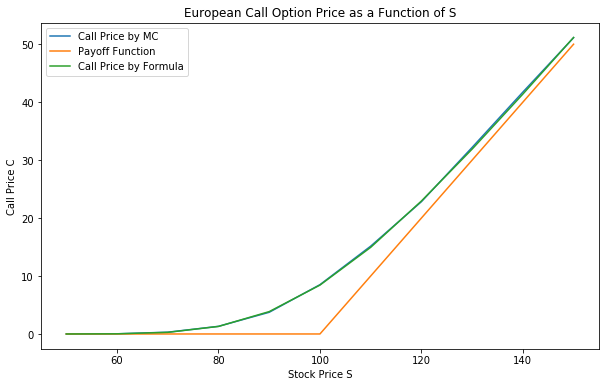

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# define the function PriceByFormula() to calculate the call option price
# by BS formula
def PriceByFormula(S0,r,sigma,T,K):
    dp=(np.log(S0/K)+(r+0.5*pow(sigma,2.0))*T)/(sigma*np.sqrt(T))
    dm=dp-sigma*np.sqrt(T)
    p=S0*norm.cdf(dp,0,1)-K*np.exp(-r*T)*norm.cdf(dm,0,1)
    return p

S=[]        # today's stock price
i=50
while i<=150:
    S.append(i)
    i=i+10
print("today's stock price",S)
r=0.01      # interest rate
sigma=0.2   # volatility
T=1         # time to maturity
m=12        # number of time steps
K=100       # strike price
N=10000     # number of replications of the MC algorithm

price=[]
for j in range(0,11):
    a=PriceByMC(S[j],r,sigma,T,m,K,N)
    price.append(a)
    print("S =",S[j],", European Call Option Price by MC=",a)

payoff=[]
for k in range(0,11):
    b=max(0,S[k]-K)
    payoff.append(b)
print("payoff:",payoff)

priceByFormula=[]
for l in range(0,11):
    c=PriceByFormula(S[l],r,sigma,T,K)
    priceByFormula.append(c)
    print("S =",S[l],", priceByFormula:",c)

# Plot the price as a function of S
plt.figure(figsize=(10, 6))
plt.plot(S, price, label=u'Call Price by MC')
plt.plot(S, payoff, label=u'Payoff Function')   # Plot the payoff function
plt.plot(S, priceByFormula, label=u'Call Price by Formula')
plt.legend()
plt.xlabel('Stock Price S')
plt.ylabel('Call Price C')
plt.title('European Call Option Price as a Function of S')



plt.show()



We find that for each S, the call prices computed by MC and computed by BS formula are very close.

## (c) Digital Option

In [3]:
# define the function CallPayoff()
def DigitalPayoff(S0,r,sigma,T,m,SamplePath,K,Q):
    ST=SamplePath[m-1]
    if ST<K:
        return 0
    else:
        return Q
    

# define the function DigitalPriceByMC() to replicate the simulation for N
# timesand compute the average of the discounted payoffs which is the option  
# price by Monte Carlo simulation
def DigitalPriceByMC(S0,r,sigma,T,m,K,N,Q):
    H=0
    S=[]
    p=[]
    i=0
    while i<N:
        S=GenerateSamplePath(S0,r,sigma,T,m)
        price=np.exp(-r*T)*DigitalPayoff(S0,r,sigma,T,m,S,K,Q)
        H=(i/(i+1))*H + price/(i+1)
        i=i+1
    return H


# test
S0=120      # today's stock price
r=0.01      # interest rate
sigma=0.2   # volatility
T=1         # time to maturity
m=12        # number of time steps
K=100       # strike price
Q=10
N=10000     # number of replications of the MC algorithm
print("Digital Option Price =",DigitalPriceByMC(S0,r,sigma,T,m,K,N,Q))

Digital Option Price = 8.02930415171
